In [2]:
%pylab inline
import os
import shutil
import random

import cv2
import yaml
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import math

Populating the interactive namespace from numpy and matplotlib


In [3]:
def get_nonzero_files(folder_path):
    file_list = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            if os.path.isfile(file_path) and os.path.getsize(file_path) > 0:
                file_list.append(file_path)
    return file_list

In [4]:
image_files = get_nonzero_files('valid/images/')

In [5]:
for i in image_files:
    image = cv2.imread(i, cv2.IMREAD_ANYCOLOR)
    image =cv2.resize(image, (640,640))
    cv2.imwrite(i, image)

In [6]:
image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

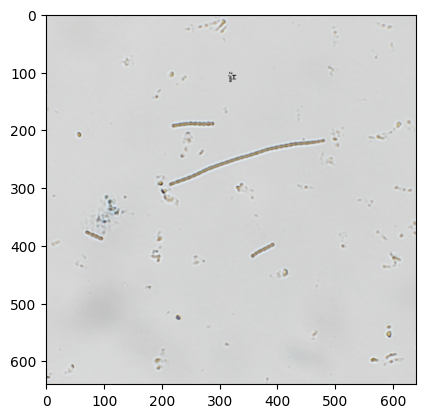

In [7]:
imshow(image)

In [8]:
def plot_yolo(img, label, r=None):
    header = ["classes", "x", "y", "width", "height"]
    df = pd.read_csv(label, sep=' ', header=None, names=header)
    df.x = (df.x * 640)
    df.y = (df.y * 640)
    df.width = (df.width *640)
    df.height = (df.height *640)
    
    image = cv2.imread(img, cv2.IMREAD_ANYCOLOR)
    if r == None:
        r = (0,len(df))
    for i in range(*r):
        image = cv2.rectangle(image, (int(df.x[i] - df.width[i]/2), int(df.y[i] - df.height[i]/2)), (int(df.x[i] + df.width[i]/2), int(df.y[i] + df.height[i]/2)),(255,0,0), 2, cv2.LINE_8)
    fig = plt.figure(figsize=(6,6))
    imshow(image)

In [9]:
root = "./valid/"
i = os.listdir(root+"images/")
l = os.listdir(root+"labels/")
i.sort()
l.sort()
dataset = [(root + "images/" + a, root + "labels/" + b) for a,b in zip(i,l)]

In [10]:
dataset[3]

('./valid/images/100rrr.png', './valid/labels/100rrr.txt')

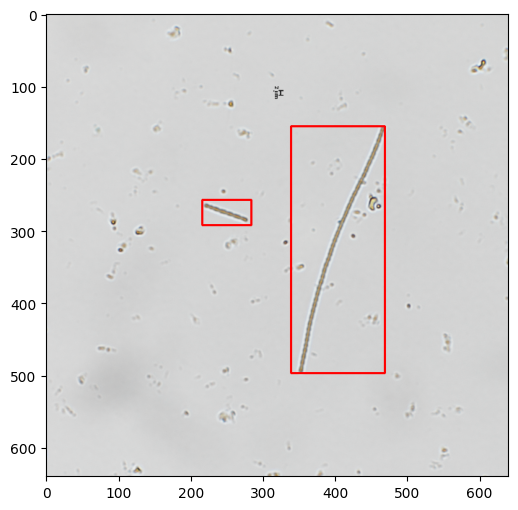

In [11]:
plot_yolo(*dataset[3])

In [80]:
def rotate_coordinates(x, y, angle):
    # 각도를 라디안으로 변환
    angle_rad = math.radians(angle)
    
    # 회전된 좌표 계산
    rotated_x = x * math.cos(angle_rad) - y * math.sin(angle_rad)
    rotated_y = x * math.sin(angle_rad) + y * math.cos(angle_rad)
    
    return rotated_x, rotated_y

In [114]:
header = ["classes", "x", "y", "width", "height"]
df = pd.read_csv('11.txt', sep=' ', header=None, names=header)

df.x = (df.x * 640)
df.y = (df.y * 640)
df.width = (df.width *640)
df.height = (df.height *640)

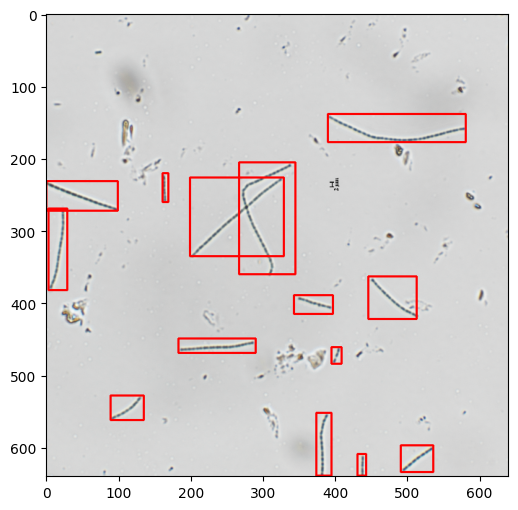

In [119]:
image = cv2.imread(dataset[0][0], cv2.IMREAD_ANYCOLOR)
image = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
r = (0,len(df))
for i in range(*r):
    image = cv2.rectangle(image, (int(df.x[i] - df.width[i]/2), int(df.y[i] - df.height[i]/2)), (int(df.x[i] + df.width[i]/2), int(df.y[i] + df.height[i]/2)),(255,0,0), 2, cv2.LINE_8)
fig = plt.figure(figsize=(6,6))
imshow(image)

In [107]:
def rotate_yolo_labels_90(yolo_labels_path, img_width, img_height):
    with open(yolo_labels_path, "r") as f:
        lines = f.readlines()

    rotated_lines = []

    for line in lines:
        class_idx, x_center_norm, y_center_norm, width_norm, height_norm = map(float, line.split())
        class_idx = int(class_idx)

        # Convert normalized center coordinates to pixel coordinates
        x_center = x_center_norm * img_width
        y_center = y_center_norm * img_height

        # Compute new pixel coordinates for rotated bounding box
        x_new = y_center
        y_new = img_width - x_center
        width_new = height_norm * img_height
        height_new = width_norm * img_width

        # Convert new pixel coordinates back to normalized coordinates
        x_new_norm = x_new / img_height
        y_new_norm = y_new / img_width
        width_new_norm = width_new / img_height
        height_new_norm = height_new / img_width

        # Append rotated annotation to list of strings
        rotated_line = f"{class_idx} {x_new_norm:.6f} {y_new_norm:.6f} {width_new_norm:.6f} {height_new_norm:.6f}\n"
        rotated_lines.append(rotated_line)

    return rotated_lines

In [108]:
a = rotate_yolo_labels_90(dataset[0][1], 640,640)

In [111]:
with open('11.txt', 'w') as f:
    for item in a:
        f.write(item)

In [167]:
"."+dataset[0][1].split('.')[1]+'r.png'

'./valid//labels/100r.png'

In [176]:
for i, l in dataset:
    img_name = "."+i.split('.')[1]+'r.png'
    label_name = "."+l.split('.')[1]+'r.txt'
    image = cv2.imread(i, cv2.IMREAD_ANYCOLOR)
    image = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    cv2.imwrite(img_name, image)
    rl = rotate_yolo_labels_90(l, 640,640)
    with open(label_name, 'w') as f:
        for item in rl:
            f.write(item)

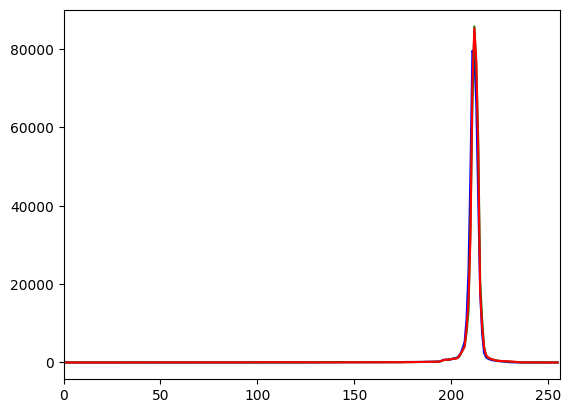

In [12]:
img = cv2.imread('valid/images/100.png', cv2.IMREAD_ANYCOLOR)

color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

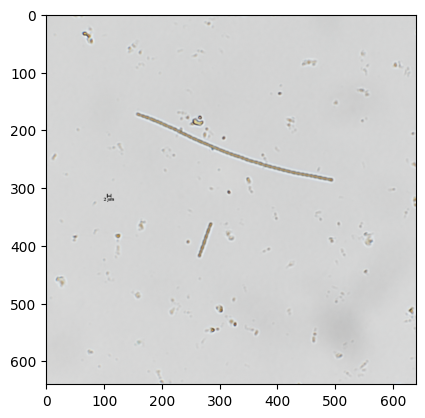

In [7]:
imshow(image)

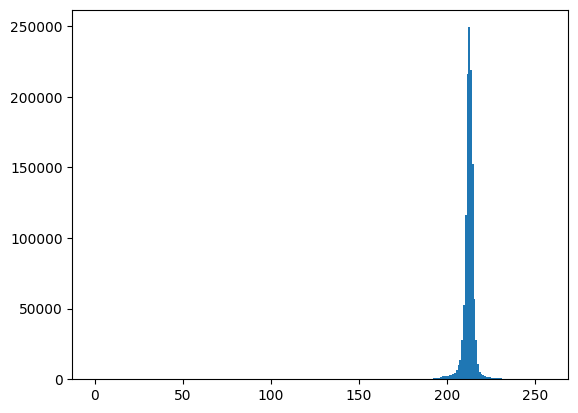

In [12]:
plt.hist(image.ravel(), 256, [0,256]); 
plt.show()

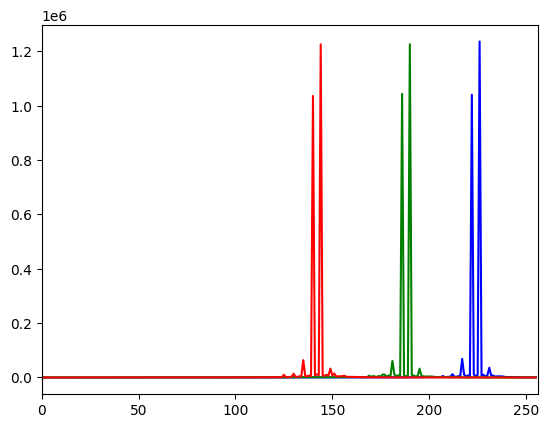

In [13]:
img = cv2.imread('test/TS3.png', cv2.IMREAD_ANYCOLOR)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

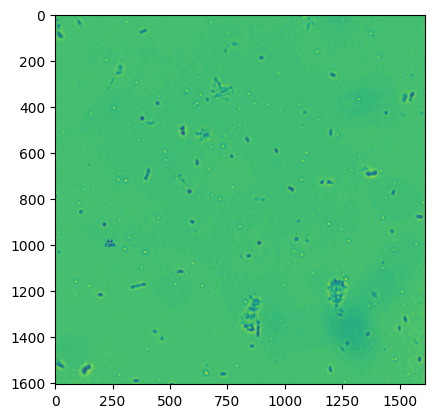

In [17]:
img = cv2.imread('test/TS3.png',0)
imshow(img)

In [18]:
cv2.imwrite('tt.png', img)

True

In [74]:
img[:,:,1][img[:,:,1] > 180] = img[:,:,1][img[:,:,1] > 180] - 40

In [75]:
img[:,:,2][img[:,:,2] > 180] = img[:,:,2][img[:,:,2] > 180] - 90

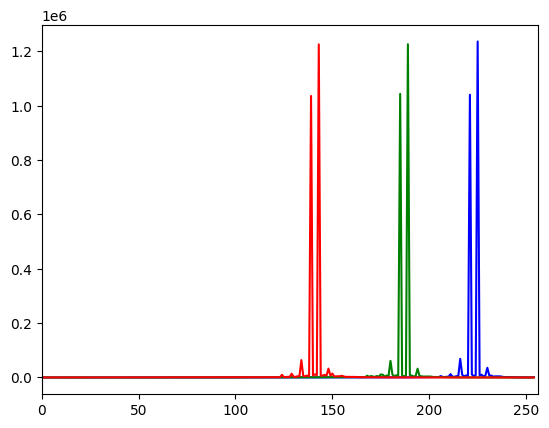

In [15]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[255],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

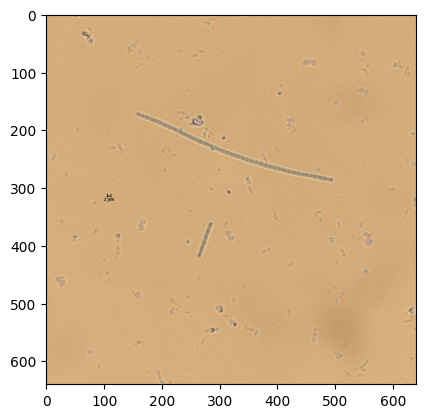

In [77]:
imshow(img)

In [66]:
cv2.imwrite('ts.png', img)

True